# 1. Importing Libraries

This section imports the required libraries for the model and setting some configurations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from matplotlib.gridspec import GridSpec 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)

sns.set_theme()
sns.set_context('paper')

warnings.filterwarnings('ignore')

# 2. Reading and Understanding the data

In this section we will load the data and do some initial analysis to understand the data

## 2.1. Read the data

In [2]:
raw_data = pd.read_csv('day.csv')
raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 2.2. Inspect the data

Check the shape of the data

In [3]:
print(raw_data.shape)

(730, 16)


Check dataframe info to verify whether the columns are having appropriate types

In [4]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


Check if there are any nulls

In [5]:
print(raw_data.isnull().sum().sum())

0


Describe the dataframe

In [6]:
raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Check for duplicates

In [7]:
raw_data.duplicated().sum()

0

## 2.3 Rename columns
Inorder to make the dataframe a bit more readable, we can rename the columns

In [8]:

data = raw_data.rename(columns={
    'mnth': 'month',
    'atemp': 'feeling_temp',
    'hum': 'humidity',
    'dteday': 'date'
})

data.head()

,instant,date,season,yr,month,holiday,weekday,workingday,weathersit,temp,feeling_temp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 2.4 Derive additional columns

Derive additional columns, if that helps in EDA.

### 2.4.1 Convert string to date

We can see that date column is string, which can be converted to datetime for proper analysis.

In [9]:
data['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 730 entries, 0 to 729
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
730 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [10]:
data['date'].value_counts()

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: date, Length: 730, dtype: int64

First find out the format of the string date. Looking at few values, we can see that the format is dd-MM-yyyy.

In [11]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')
data['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 730 entries, 0 to 729
Series name: date
Non-Null Count  Dtype         
--------------  -----         
730 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [12]:
data.head()

,instant,date,season,yr,month,holiday,weekday,workingday,weathersit,temp,feeling_temp,humidity,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 2.4.2. Set categorical variables appropriately

In the data we have few categorical variables, which are having numerical values. Inorder to understand the data better as part of EDA, we can set proper values to these variables by comparing it with the Data Dictionary.

The data dictionary is as follows:

In [13]:
text_file = open('Readme.txt')
data_dictionary = text_file.read()
print(data_dictionary)

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
License

#### 2.4.2.1 Season

In [14]:
season_values = ['Spring', 'Summer', 'Fall', 'Winter']
data['season'] = data['season'].apply(lambda x: season_values[int(x) - 1])
data['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

#### 2.4.2.2 Year Month and Day of Week

The values of these columns can be derived from the date which is datetime object now

In [15]:
data['year'] = data['date'].dt.year
data['year'].value_counts()

2018    365
2019    365
Name: year, dtype: int64

In [16]:
data['month_name'] = data['date'].dt.month_name()
data['month_name'].value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: month_name, dtype: int64

In [17]:
data['weekday'] = data['date'].dt.strftime('%A')
data['weekday'].value_counts()

Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64

#### 2.4.2.3 Boolean fields - Holiday & WorkingDay

We will convert the numeric 1 0 values to yes/no values

In [18]:
yes_no_values = ['No', 'Yes']
data['holiday'] = data['holiday'].apply(lambda x: yes_no_values[x])
data['holiday'].value_counts()

No     709
Yes     21
Name: holiday, dtype: int64

In [19]:
data['workingday'] = data['workingday'].apply(lambda x: yes_no_values[x])
data['workingday'].value_counts()

Yes    499
No     231
Name: workingday, dtype: int64

#### 2.4.2.4 Weathersit

We will set the categorical variable for weathersit. This category values according to the data dictionary is long. We would summarize it as below:

1. Clear - Category one mostly represent a clear sky. Cloudy would also be part of it, but there is no rain or snow
2. Mist  - Mist and Mist with some clouds
3. Light Falls - Snow or Rainfall, but its light
4. Heavy Falls - Snow or Rainfall, but heavy

In [20]:
weathers = ['Clear', 'Mist', 'LightFalls', 'HeavyFalls']
data['weathersit'] = data['weathersit'].apply(lambda x: weathers[x - 1])
data['weathersit'].value_counts()

Clear         463
Mist          246
LightFalls     21
Name: weathersit, dtype: int64

### 2.4.3 Drop Unnecessary columns

In this section, we will drop unnecessary columns.


In [21]:
data.head()

,instant,date,season,yr,month,holiday,weekday,workingday,weathersit,temp,feeling_temp,humidity,windspeed,casual,registered,cnt,year,month_name
0,1,2018-01-01,Spring,0,1,No,Monday,No,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,January
1,2,2018-01-02,Spring,0,1,No,Tuesday,No,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,January
2,3,2018-01-03,Spring,0,1,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,January
3,4,2018-01-04,Spring,0,1,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,January
4,5,2018-01-05,Spring,0,1,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,January


From the data frame, below columns can be dropped:
1. yr - We already have extracted year into a column
2. month - We have extracted this to month name
3. Casual & Registered - These are already captured as part of cnt.
4. date - We have already extracted year and month from the same.
5. instant - This is just an id field

In [22]:
data = data.drop(columns=['yr', 'month', 'casual', 'registered', 'date', 'instant'])
data.head()

,season,holiday,weekday,workingday,weathersit,temp,feeling_temp,humidity,windspeed,cnt,year,month_name
0,Spring,No,Monday,No,Mist,14.110847,18.18125,80.5833,10.749882,985,2018,January
1,Spring,No,Tuesday,No,Mist,14.902598,17.68695,69.6087,16.652113,801,2018,January
2,Spring,No,Wednesday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,January
3,Spring,No,Thursday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,January
4,Spring,No,Friday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,January


# 2.3. Visualize the Data

We would plot some charts to understand more of the data.

We will plot some box plots for each categorical variables

In [23]:
# Utility function to add some box plots

def add_boxplot(fig, nrows, ncols, index, data, categorical_variable, title=None, ylabel=False):
    ax = fig.add_subplot(nrows, ncols, index)
    sns.boxplot(x = categorical_variable, y = 'cnt', data=data)
    if title != None:
        ax.set_title(title)
    if ylabel:
        ax.set(ylabel='Count')
    else:
        ax.set(ylabel=None)

<Axes: xlabel='temp'>

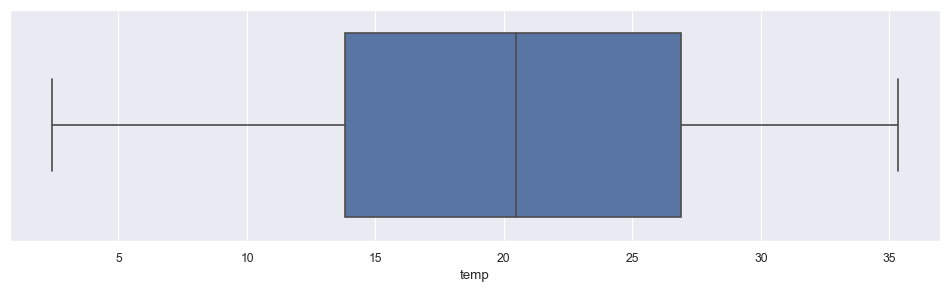

In [24]:
fig = plt.figure(figsize=(12, 3))

sns.boxplot(data=data, x='temp')

<Axes: xlabel='feeling_temp'>

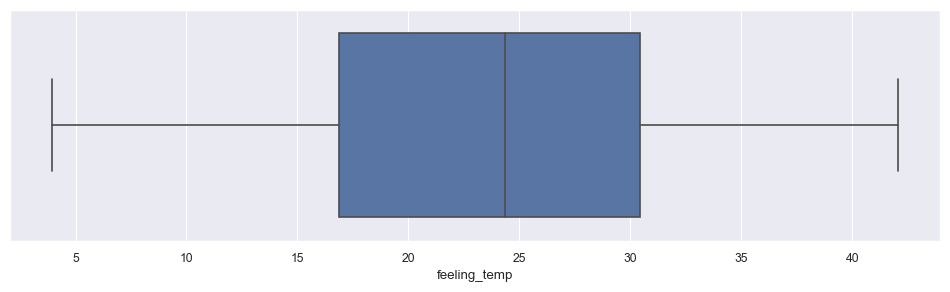

In [25]:
fig = plt.figure(figsize=(12, 3))

sns.boxplot(data=data, x='feeling_temp')

<Axes: xlabel='humidity'>

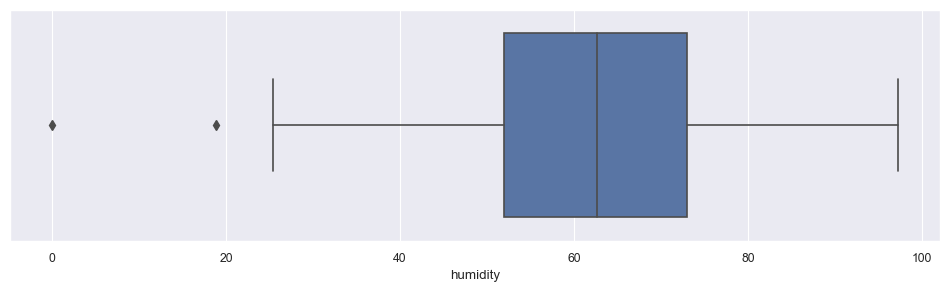

In [26]:
fig = plt.figure(figsize=(12, 3))

sns.boxplot(data=data, x='humidity')

In [27]:
data[data['humidity'] == 0]

,season,holiday,weekday,workingday,weathersit,temp,feeling_temp,humidity,windspeed,cnt,year,month_name
68,Spring,No,Saturday,Yes,LightFalls,15.952731,19.2834,0.0,17.545759,623,2018,March


There are two outliers for humidity. Of these the humidity of 0% is incorrect. We can correct this by setting this as mean.

In [28]:
data.loc[data['humidity'] == 0, 'humidity'] = data['humidity'].mean()

<Axes: xlabel='humidity'>

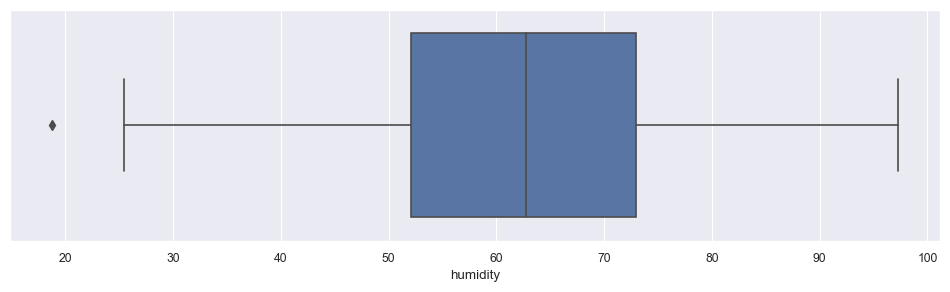

In [29]:
fig = plt.figure(figsize=(12, 3))

sns.boxplot(data=data, x='humidity')

<Axes: xlabel='windspeed'>

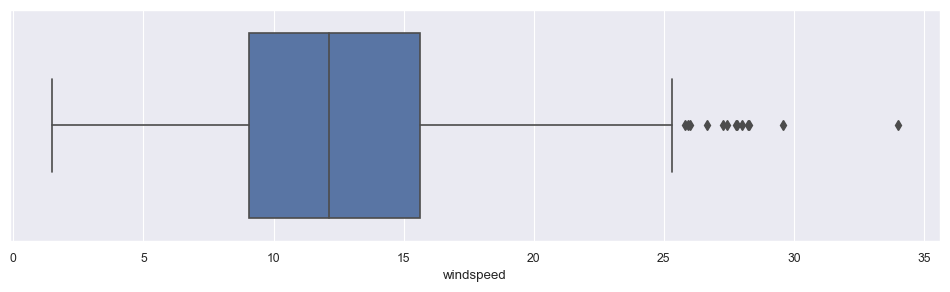

In [30]:
fig = plt.figure(figsize=(12, 3))

sns.boxplot(data=data, x='windspeed')

In [31]:
data[data['windspeed'] > 25]

,season,holiday,weekday,workingday,weathersit,temp,feeling_temp,humidity,windspeed,cnt,year,month_name
44,Spring,No,Wednesday,Yes,Clear,17.015000,19.91750,37.5833,27.999836,1913,2018,February
49,Spring,No,Monday,No,Clear,16.365847,19.57020,18.7917,34.000021,1635,2018,February
93,Summer,No,Wednesday,Yes,Clear,23.506653,27.14645,42.6250,25.833257,3115,2018,April
94,Summer,No,Thursday,Yes,Mist,16.980847,19.91750,64.2083,26.000489,1795,2018,April
238,Fall,No,Monday,No,Mist,27.880000,31.77780,85.0000,25.166339,1115,2018,August
292,Winter,No,Saturday,Yes,Clear,19.509153,23.32625,63.6250,28.292425,4195,2018,October
377,Spring,No,Sunday,Yes,Clear,11.240847,12.46810,50.7500,25.333236,3214,2019,January
382,Spring,No,Friday,Yes,Clear,12.436653,13.76270,44.3333,27.833743,3376,2019,January
407,Spring,No,Tuesday,No,Clear,5.227500,5.08290,46.4583,27.417204,1529,2019,February
420,Spring,No,Monday,No,Clear,11.924153,12.78375,39.5833,28.250014,2732,2019,February


Since we have other useful features in the rows with outlier values of windspeed, we will keep these as it is for now.

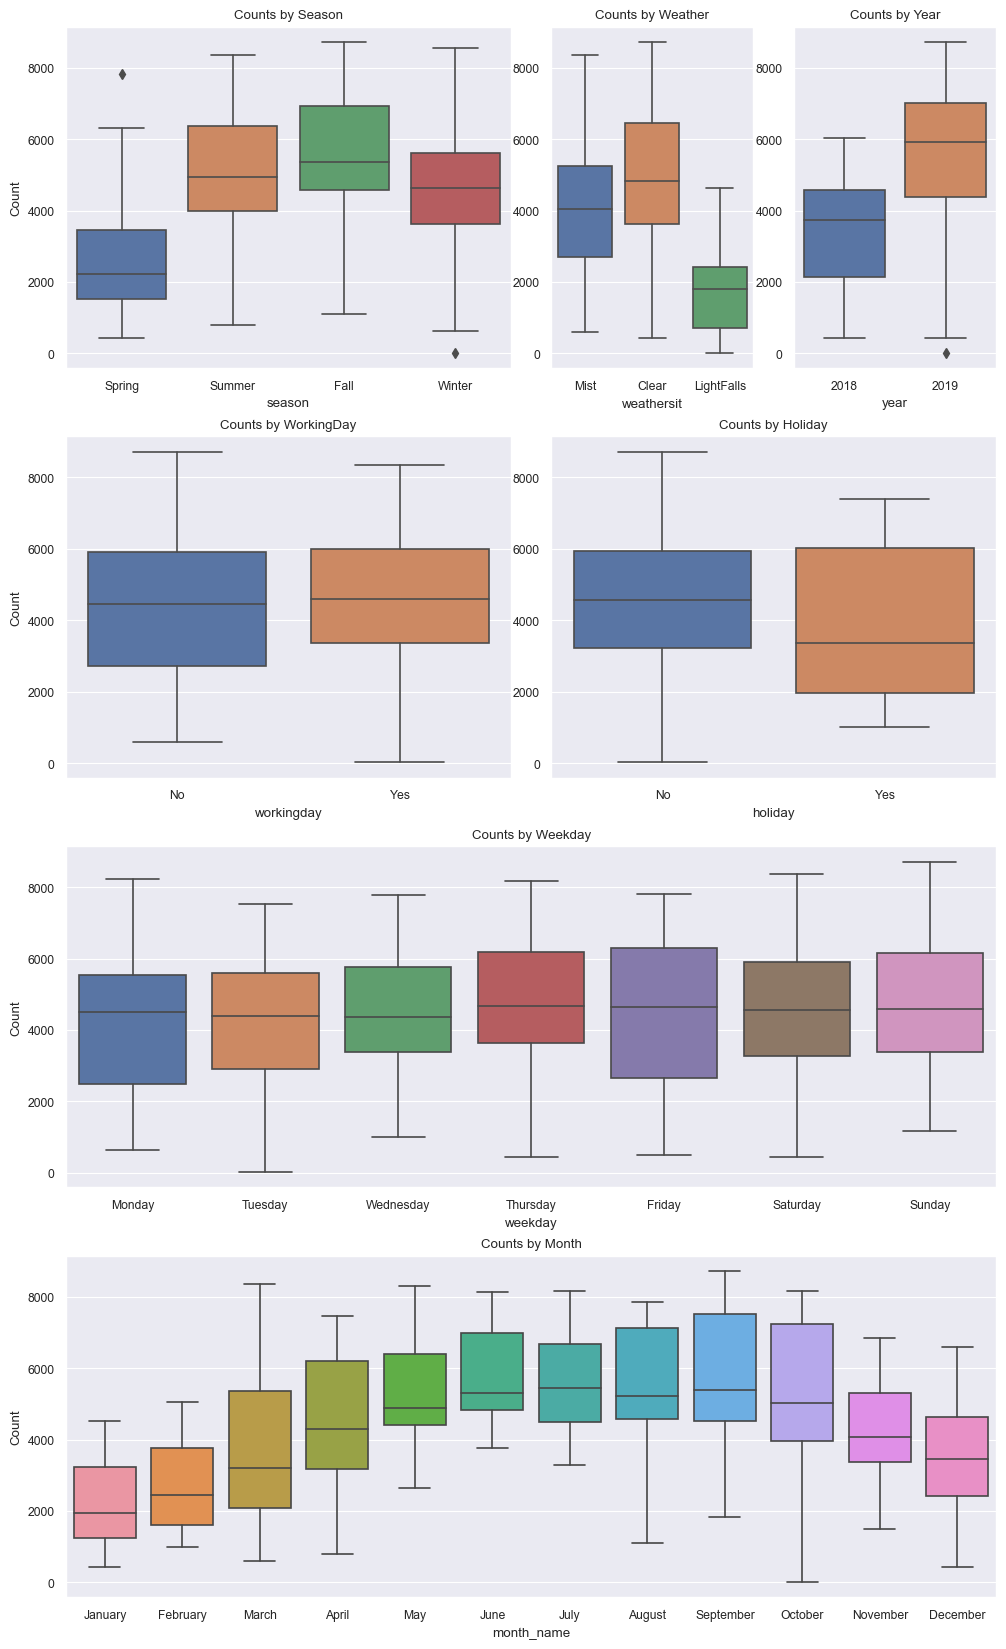

In [32]:
fig = plt.figure(figsize=(12, 20))

nrows = 5
ncols = 4

# ax1 = fig.add_subplot(nrows, ncols, 1)
# sns.boxplot(x = 'season', y = 'cnt', data=data)

add_boxplot(fig, nrows, ncols, (1,2), data, 'season', 'Counts by Season', ylabel=True)
add_boxplot(fig, nrows, ncols, 3, data, 'weathersit', 'Counts by Weather')
add_boxplot(fig, nrows, ncols, 4, data, 'year', 'Counts by Year')
add_boxplot(fig, nrows, ncols, (5,6), data, 'workingday', 'Counts by WorkingDay', ylabel=True)
add_boxplot(fig, nrows, ncols, (7,8), data, 'holiday', 'Counts by Holiday')
add_boxplot(fig, nrows, ncols, (9,12), data, 'weekday', 'Counts by Weekday', ylabel=True)
add_boxplot(fig, nrows, ncols, (13,16), data, 'month_name', 'Counts by Month', ylabel=True)


plt.subplots_adjust(top=1.1)


From the above plots, we can observe that:
- The count is higher in Fall season
- The count is highest when the weather is Clear
- Count is higher for 2019. This could be indicating that the count increases over time.
- The counts are slightly higher on working days compared to holidays/weekdays
- There is no clear trend on count base on just the day of the week
- The count is increasing till the second quarter of the year and decreases on the last quarter.

We would try pair plots to see any patterns between the continous variables.

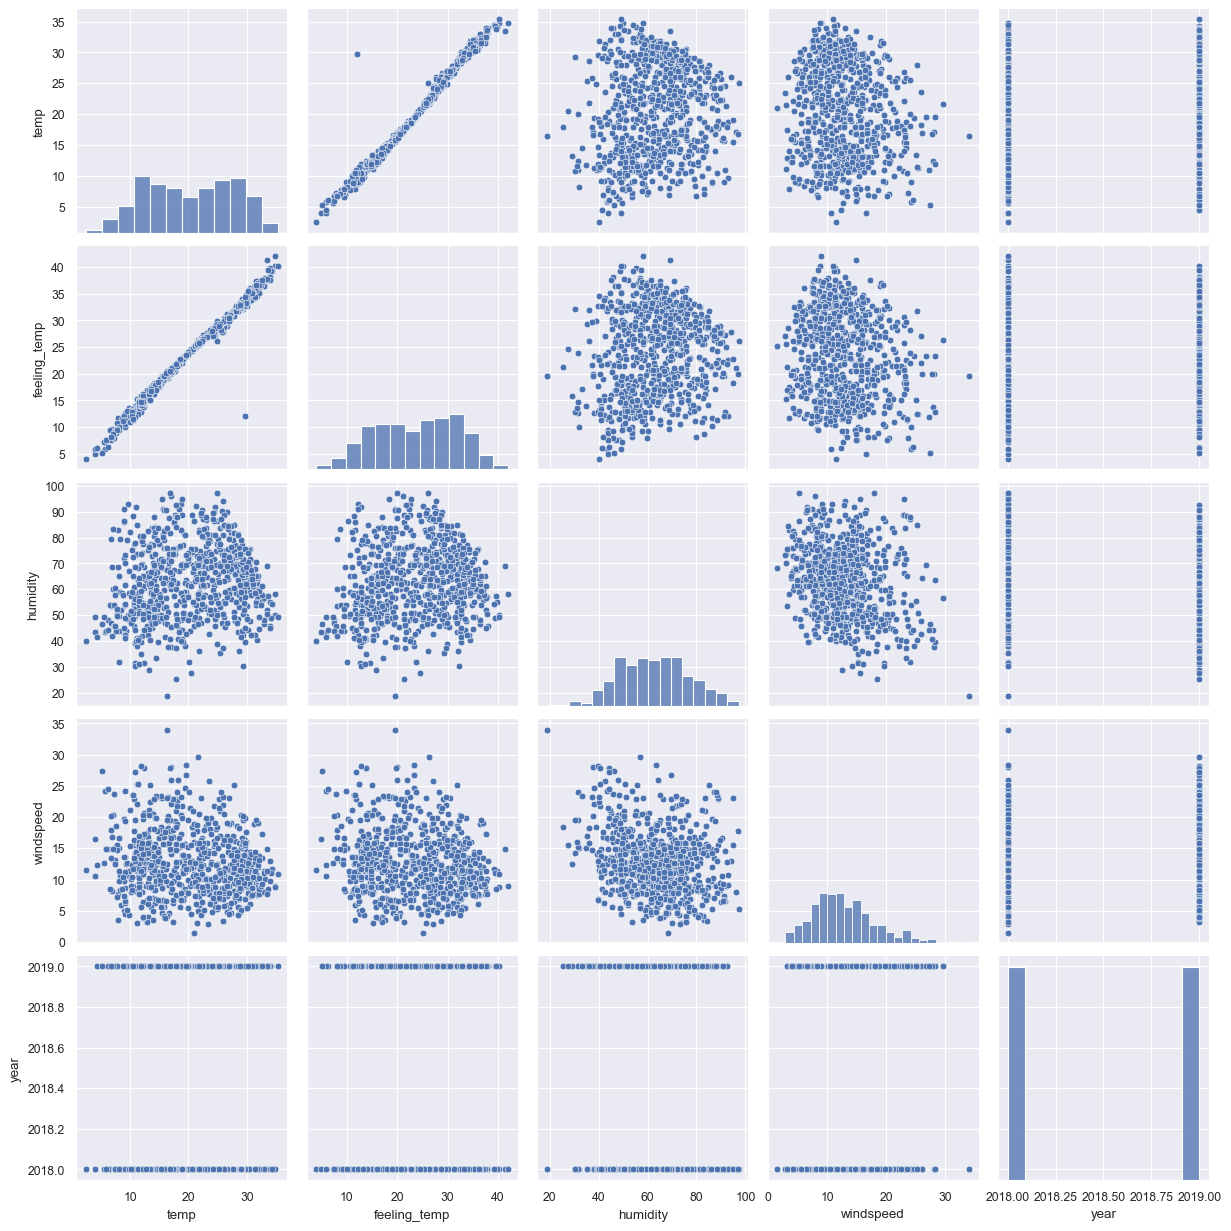

In [33]:
pairplot_df = data[['temp', 'feeling_temp', 'humidity', 'windspeed', 'year']]
sns.pairplot(pairplot_df)

From the above, we can se that there is a high correlation between **temp** and **feeling_temp**.

<Axes: >

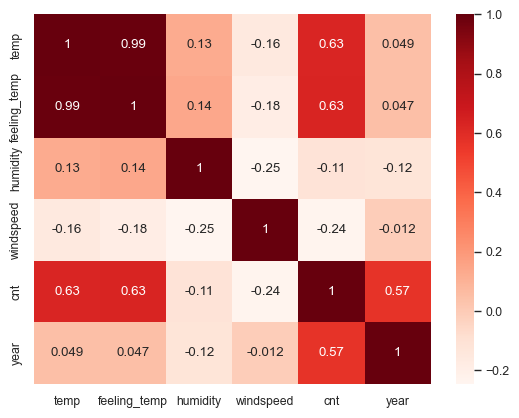

In [34]:
sns.heatmap(data.corr(), cmap='Reds', annot=True)

From the heatmap above we can confirm that the **temp and feeling_temp has a high correlation** and also, both have a good correlation with cnt. We can drop one of them. We will drop feeling_temp

In [35]:
data = data.drop(columns=['feeling_temp'])

# 3. Data Preparation

In this section we will prepare the data for modelling

## 3.1 Mapping the Yes/No Columns

The columns which are Yes/No can be represented as 1/0.

In [36]:
data.head()

,season,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt,year,month_name
0,Spring,No,Monday,No,Mist,14.110847,80.5833,10.749882,985,2018,January
1,Spring,No,Tuesday,No,Mist,14.902598,69.6087,16.652113,801,2018,January
2,Spring,No,Wednesday,Yes,Clear,8.050924,43.7273,16.636703,1349,2018,January
3,Spring,No,Thursday,Yes,Clear,8.200000,59.0435,10.739832,1562,2018,January
4,Spring,No,Friday,Yes,Clear,9.305237,43.6957,12.522300,1600,2018,January


In [37]:
yes_no_cols = ['holiday', 'workingday']

data[yes_no_cols] = data[yes_no_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
data.head()

,season,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt,year,month_name
0,Spring,0,Monday,0,Mist,14.110847,80.5833,10.749882,985,2018,January
1,Spring,0,Tuesday,0,Mist,14.902598,69.6087,16.652113,801,2018,January
2,Spring,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,2018,January
3,Spring,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,2018,January
4,Spring,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,2018,January


## 3.2 Creating dummy variables

For other categorical columns, we would be creating dummy variables. The year can be a categorical variable. But in this case since the count in increase can continue to future years also, inorder to capture this in the model, the year is kept as a numerical variable instead of categorical.

In [38]:
categorical_columns = ['season', 'weekday', 'weathersit', 'month_name']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [39]:
data.head()

,holiday,workingday,temp,humidity,windspeed,cnt,year,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightFalls,weathersit_Mist,month_name_August,month_name_December,month_name_February,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September
0,0,0,14.110847,80.5833,10.749882,985,2018,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,2018,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,1,8.050924,43.7273,16.636703,1349,2018,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,2018,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# 4. Split Data to Train and Test

In this section we are splitting the data into training and test sets.

In [40]:
train_data, test_data = train_test_split(data, train_size=0.7, random_state=100)

print(train_data.shape)
print(test_data.shape)

(510, 29)
(220, 29)


# 5. Rescaling Features

We will do normalization on the data. The current data sample is:

In [41]:
data.head()

,holiday,workingday,temp,humidity,windspeed,cnt,year,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightFalls,weathersit_Mist,month_name_August,month_name_December,month_name_February,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September
0,0,0,14.110847,80.5833,10.749882,985,2018,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,2018,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,1,8.050924,43.7273,16.636703,1349,2018,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,2018,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [42]:
data.columns.to_list()

['holiday',
 'workingday',
 'temp',
 'humidity',
 'windspeed',
 'cnt',
 'year',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'weathersit_LightFalls',
 'weathersit_Mist',
 'month_name_August',
 'month_name_December',
 'month_name_February',
 'month_name_January',
 'month_name_July',
 'month_name_June',
 'month_name_March',
 'month_name_May',
 'month_name_November',
 'month_name_October',
 'month_name_September']

In [43]:
vars_to_rescale = ['temp', 'humidity', 'windspeed', 'year', 'cnt']
scaler = MinMaxScaler()

train_data[vars_to_rescale] = scaler.fit_transform(train_data[vars_to_rescale])
train_data.head()

,holiday,workingday,temp,humidity,windspeed,cnt,year,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightFalls,weathersit_Mist,month_name_August,month_name_December,month_name_February,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September
576,0,1,0.815169,0.659744,0.264686,0.827658,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,0,0,0.442393,0.553780,0.255342,0.465255,1.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
728,0,0,0.245101,0.377528,0.663106,0.204096,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,0,0,0.395666,0.385516,0.188475,0.482973,1.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
111,0,1,0.345824,0.692225,0.380981,0.191095,0.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

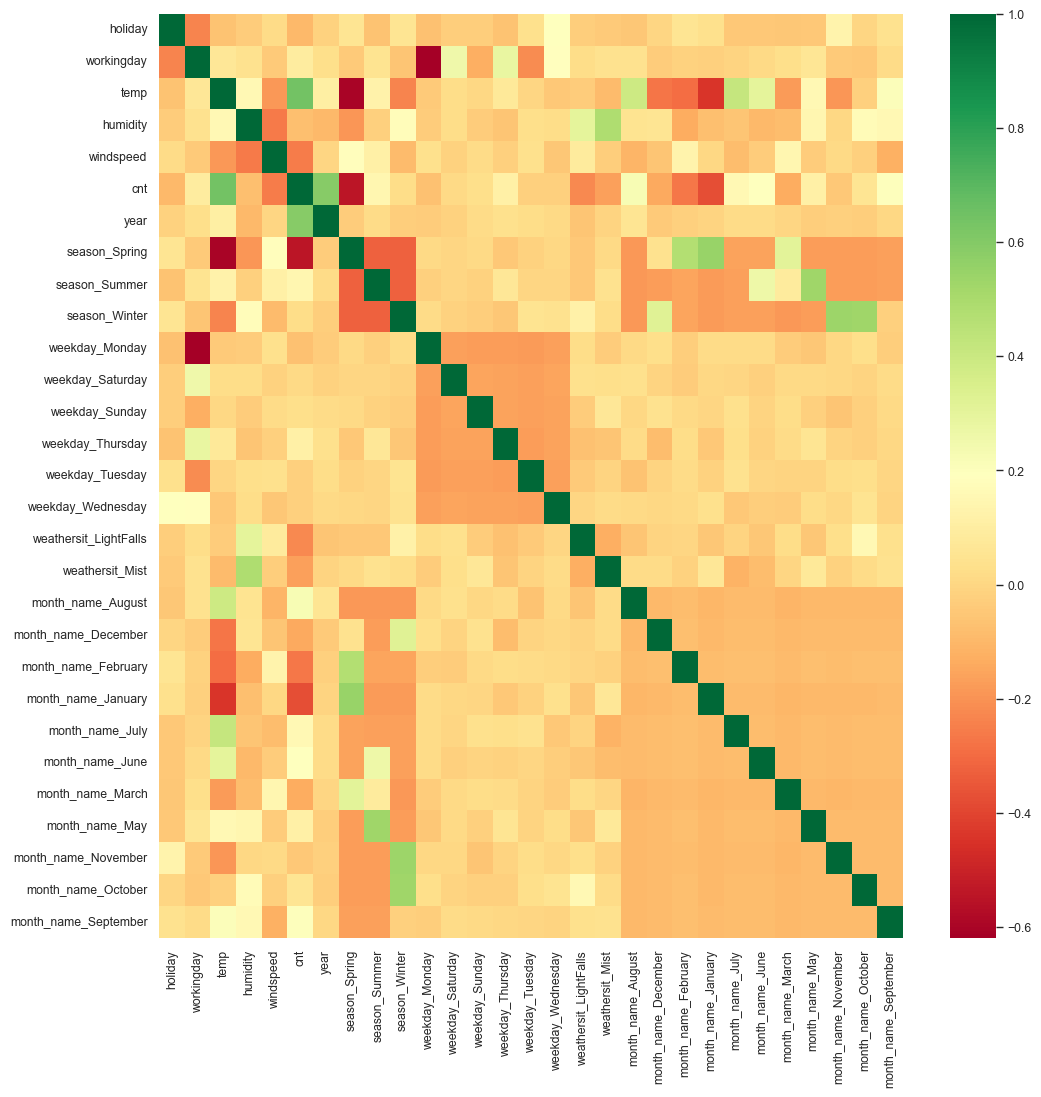

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(train_data.corr(), cmap='RdYlGn')

# 6. Build Model

For ease of building model, we will create utility functions to help with the model creation

In [45]:
# Utility functions

# To create a model using statsmodels api
def create_model(X_train, y_train):
    X_train_sm = sm.add_constant(X_train)
    lr = sm.OLS(y_train, X_train_sm)
    lr_model = lr.fit()
    return lr_model

# To generate the VIF values for the dataframe
def calculateVif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

# To plot the residuals from predicted and actual Y values
def plot_residuals(lr_model, X_data, y_data):
    X_data_sm = sm.add_constant(X_train)
    y_data_pred = lr_model.predict(X_data_sm)
    res = y_data - y_data_pred
    sns.distplot(res)
    plt.xlabel('Residual')
    plt.title('Error Distribution')
    return res, y_data_pred
    
# For feature selection using RFE
def getRFE(X_train, y_train, var_count):
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    rfe = RFE(estimator=lm, n_features_to_select=var_count)
    rfe = rfe.fit(X_train, y_train)
    results = {
        'Feature': X_train.columns,
        'RFE Support': rfe.support_,
        'RFE Ranking': rfe.ranking_
    }
    return pd.DataFrame(results).sort_values(by='RFE Ranking')

Using RFE we will select 15 columns to start with. Iteratively we will drop irrelavant columns from the model to make the model more robust.

## 6.1 Iteration 1

In [46]:
# Split the data
y_train = train_data.pop('cnt')
X_train = train_data

In [47]:
rfe_data = getRFE(X_train, y_train, 15)
selected_columns = rfe_data[rfe_data['RFE Support'] == True]['Feature'].to_list()
rfe_data

,Feature,RFE Support,RFE Ranking
0,holiday,True,1
25,month_name_November,True,1
21,month_name_July,True,1
20,month_name_January,True,1
18,month_name_December,True,1
16,weathersit_Mist,True,1
15,weathersit_LightFalls,True,1
8,season_Winter,True,1
27,month_name_September,True,1
4,windspeed,True,1


From the results above, we can start with the highest ranked columns by RFE function.

In [48]:
X_train = X_train[selected_columns]

In [49]:
lr_model = create_model(X_train, y_train)
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.5
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          7.47e-189
Time:                        23:27:49   Log-Likelihood:                 514.28
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     494   BIC:                            -928.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2900      0.033      8.713      0.000       0.225       0.355
holiday                  -0.0911      0.026     -3.560      0.000      -0.141      -0.041
month_name_November      -0.0383      0.019     -2.035      0.042      -0.075      -0.001
month_name_July          -0.0559      0.018     -3.062      0.002      -0.092      -0.020
month_name_January       -0.0440      0.018     -2.425      0.016      -0.080      -0.008
month_name_December      -0.0350      0.018     -1.994      0.047      -0.069      -0.001
weathersit_Mist          -0.0524      0.011     -4.898      0.000      -0.073      -0.031
weathersit_LightFalls    -0.2355      0.027     -8.566      0.000      -0.290      -0.182
season_Winter             0.1031      0.018      5.705      0.000       0.068       0.139
month_name_September      0.0758      0.017      4.484      0.000       0.043       0.109
windspeed                -0.1910      0.026     -7.365      0.000      -0.242      -0.140
temp                      0.4863      0.037     13.031      0.000       0.413       0.560
humidity                 -0.1401      0.032     -4.312      0.000      -0.204      -0.076
season_Summer             0.0432      0.015      2.814      0.005       0.013       0.073
year                      0.2298      0.008     28.358      0.000       0.214       0.246
season_Spring            -0.0584      0.021     -2.739      0.006      -0.100      -0.017
==============================================================================
Omnibus:                       67.361   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.781
Skew:                          -0.690   Prob(JB):                     7.41e-36
Kurtosis:                       5.389   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
calculateVif(X_train)

,Features,VIF
11,humidity,21.37
10,temp,14.27
9,windspeed,4.86
14,season_Spring,3.84
7,season_Winter,3.73
12,season_Summer,2.60
5,weathersit_Mist,2.49
13,year,2.10
1,month_name_November,1.83
3,month_name_January,1.71


While checking the VIF, we can see that humidity has a high VIF(Variance Inflation Factor). This means that some of the other feature in the dataset derives. Since the p-values of all other features are less than 0.05, we can consider removing the humidity feature, which is of high VIF.

## 6.2 Iteration 2

In [51]:
selected_columns.remove('humidity')

In [52]:
X_train = X_train[selected_columns]
calculateVif(X_train)

,Features,VIF
10,temp,5.17
9,windspeed,4.67
7,season_Winter,2.95
13,season_Spring,2.89
11,season_Summer,2.24
12,year,2.07
1,month_name_November,1.81
3,month_name_January,1.66
2,month_name_July,1.59
5,weathersit_Mist,1.57


We still see that the temp is having high VIF above 5. We will check p-values

In [53]:
lr_model = create_model(X_train, y_train)
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          4.75e-186
Time:                        23:27:49   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2450      0.032      7.618      0.000       0.182       0.308
holiday                  -0.0918      0.026     -3.522      0.000      -0.143      -0.041
month_name_November      -0.0395      0.019     -2.064      0.040      -0.077      -0.002
month_name_July          -0.0500      0.019     -2.703      0.007      -0.086      -0.014
month_name_January       -0.0500      0.018     -2.719      0.007      -0.086      -0.014
month_name_December      -0.0428      0.018     -2.413      0.016      -0.078      -0.008
weathersit_Mist          -0.0801      0.009     -9.198      0.000      -0.097      -0.063
weathersit_LightFalls    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
season_Winter             0.0869      0.018      4.831      0.000       0.052       0.122
month_name_September      0.0687      0.017      4.015      0.000       0.035       0.102
windspeed                -0.1585      0.025     -6.276      0.000      -0.208      -0.109
temp                      0.4387      0.036     12.093      0.000       0.367       0.510
season_Summer             0.0349      0.015      2.251      0.025       0.004       0.065
year                      0.2345      0.008     28.687      0.000       0.218       0.251
season_Spring            -0.0713      0.021     -3.314      0.001      -0.113      -0.029
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above summary, the p-value of all the variables are relatively low. We can check the correlation matrix to find features having high correlation to temp.

<Axes: >

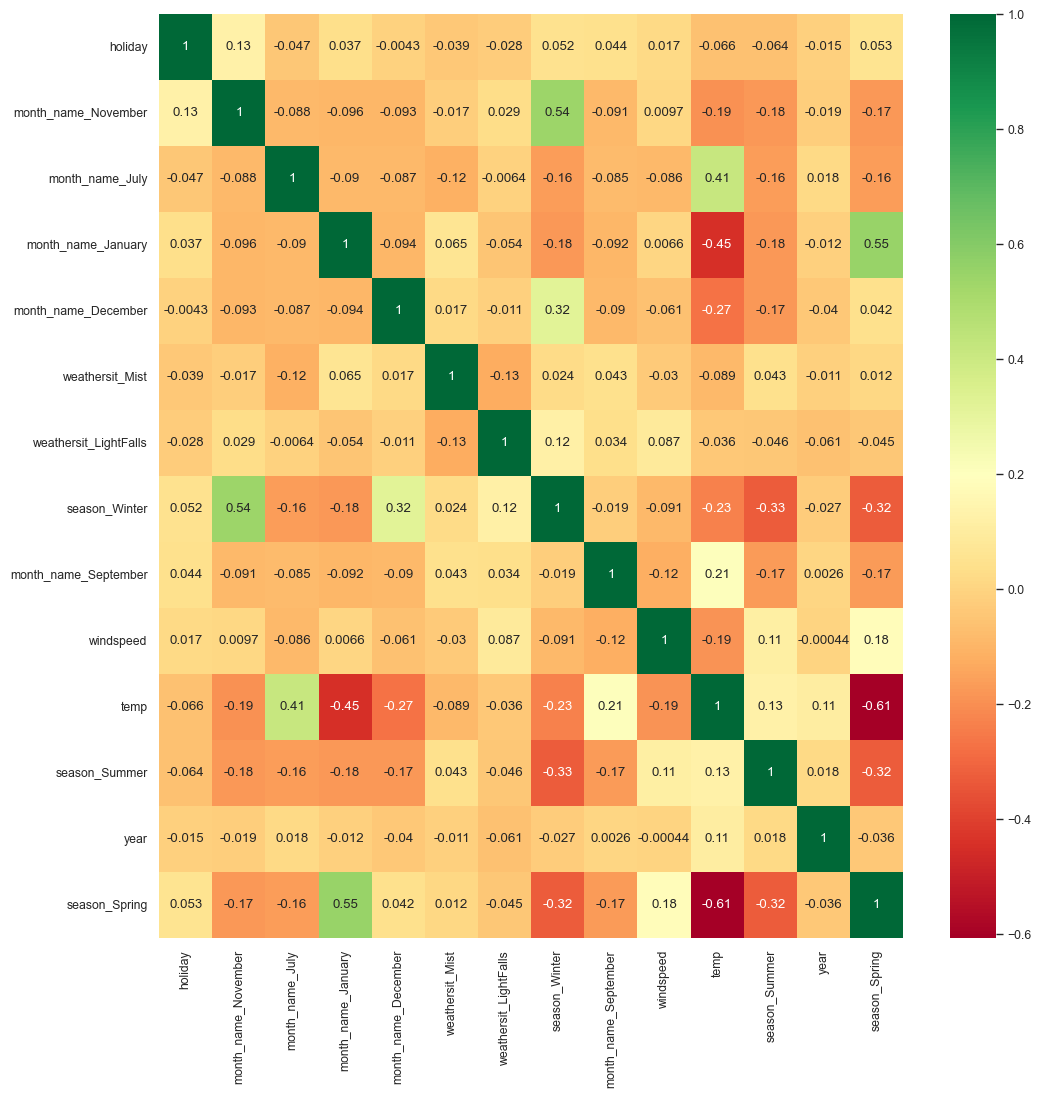

In [54]:
plt.figure(figsize=(12, 12))
sns.heatmap(X_train.corr(), cmap='RdYlGn', annot=True)

The month_name_July have high correlation with temp. So we will try removing this and see if that helps reduce the VIF for temp.

## 6.3 Iteration 3

In [55]:
selected_columns.remove('month_name_July')

In [56]:
X_train = X_train[selected_columns]
calculateVif(X_train)

,Features,VIF
8,windspeed,4.66
9,temp,3.88
6,season_Winter,2.77
12,season_Spring,2.76
11,year,2.07
10,season_Summer,1.91
1,month_name_November,1.81
2,month_name_January,1.65
4,weathersit_Mist,1.56
3,month_name_December,1.46


In [57]:
lr_model = create_model(X_train, y_train)
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.23e-185
Time:                        23:27:50   Log-Likelihood:                 501.12
No. Observations:                 510   AIC:                            -974.2
Df Residuals:                     496   BIC:                            -915.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2379      0.032      7.373      0.000       0.174       0.301
holiday                  -0.0907      0.026     -3.460      0.001      -0.142      -0.039
month_name_November      -0.0393      0.019     -2.040      0.042      -0.077      -0.001
month_name_January       -0.0522      0.018     -2.824      0.005      -0.089      -0.016
month_name_December      -0.0434      0.018     -2.429      0.015      -0.078      -0.008
weathersit_Mist          -0.0787      0.009     -8.994      0.000      -0.096      -0.061
weathersit_LightFalls    -0.2926      0.025    -11.803      0.000      -0.341      -0.244
season_Winter             0.0988      0.018      5.628      0.000       0.064       0.133
month_name_September      0.0823      0.016      4.994      0.000       0.050       0.115
windspeed                -0.1591      0.025     -6.263      0.000      -0.209      -0.109
temp                      0.4248      0.036     11.755      0.000       0.354       0.496
season_Summer             0.0496      0.015      3.400      0.001       0.021       0.078
year                      0.2350      0.008     28.586      0.000       0.219       0.251
season_Spring            -0.0597      0.021     -2.814      0.005      -0.101      -0.018
==============================================================================
Omnibus:                       73.264   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.059
Skew:                          -0.742   Prob(JB):                     1.31e-39
Kurtosis:                       5.495   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: >

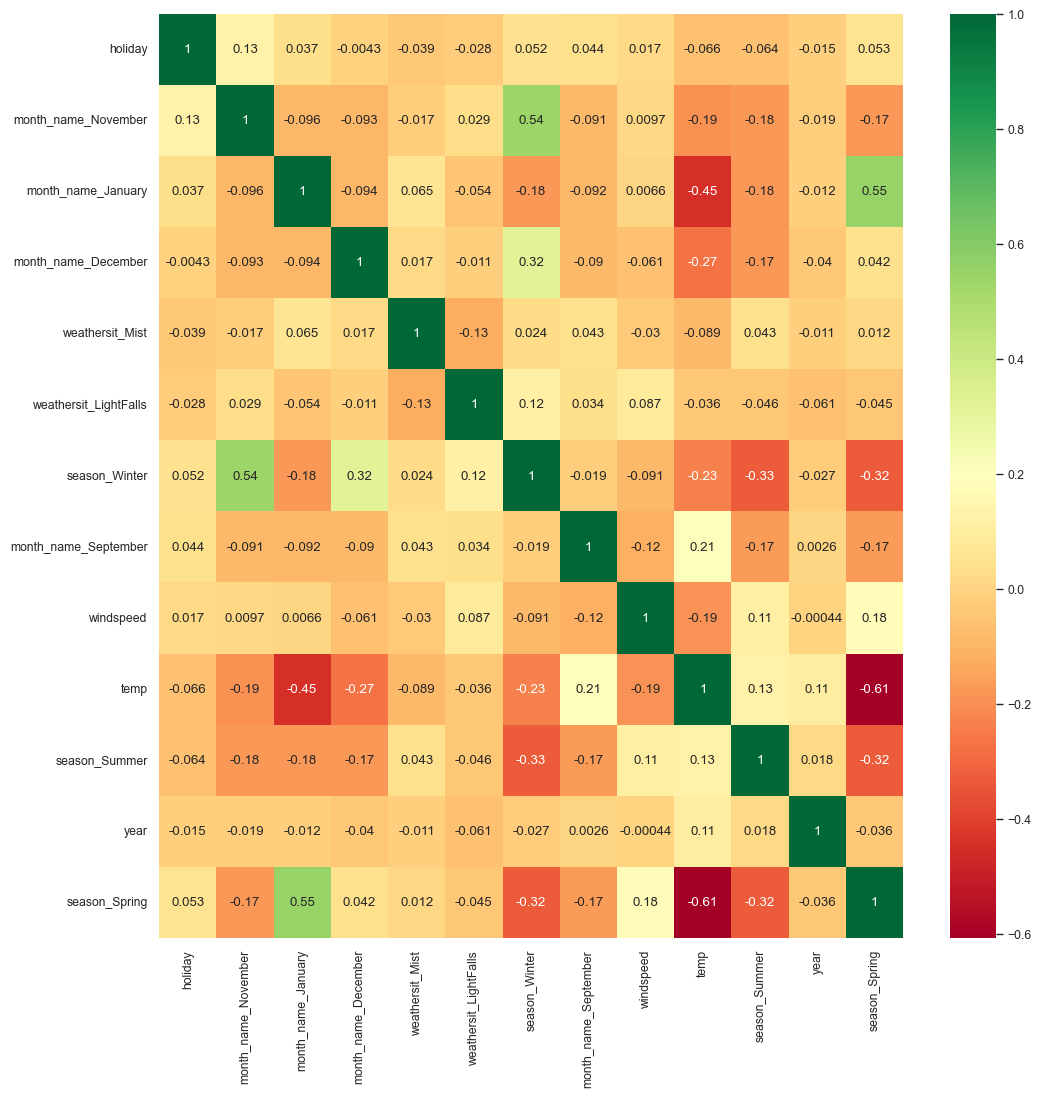

In [58]:
plt.figure(figsize=(12, 12))
sns.heatmap(X_train.corr(), cmap='RdYlGn', annot=True)

From above correlation matrix, the month of january has high correlation with the season spring. We can drop the month_name_January to improve the model.

## 6.4 Iteration 4

In [59]:
selected_columns.remove('month_name_January')

In [60]:
X_train = X_train[selected_columns]
calculateVif(X_train)

,Features,VIF
7,windspeed,4.65
8,temp,3.86
5,season_Winter,2.74
10,year,2.07
11,season_Spring,2.04
9,season_Summer,1.91
1,month_name_November,1.81
3,weathersit_Mist,1.55
2,month_name_December,1.42
6,month_name_September,1.25


In [61]:
lr_model = create_model(X_train, y_train)
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.3
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          4.28e-185
Time:                        23:27:52   Log-Likelihood:                 497.05
No. Observations:                 510   AIC:                            -968.1
Df Residuals:                     497   BIC:                            -913.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2096      0.031      6.787      0.000       0.149       0.270
holiday                  -0.0922      0.026     -3.493      0.001      -0.144      -0.040
month_name_November      -0.0323      0.019     -1.678      0.094      -0.070       0.006
month_name_December      -0.0309      0.017     -1.772      0.077      -0.065       0.003
weathersit_Mist          -0.0796      0.009     -9.043      0.000      -0.097      -0.062
weathersit_LightFalls    -0.2896      0.025    -11.609      0.000      -0.339      -0.241
season_Winter             0.1048      0.018      5.975      0.000       0.070       0.139
month_name_September      0.0852      0.017      5.147      0.000       0.053       0.118
windspeed                -0.1488      0.025     -5.876      0.000      -0.199      -0.099
temp                      0.4567      0.035     13.212      0.000       0.389       0.525
season_Summer             0.0563      0.015      3.884      0.000       0.028       0.085
year                      0.2341      0.008     28.299      0.000       0.218       0.250
season_Spring            -0.0642      0.021     -3.015      0.003      -0.106      -0.022
==============================================================================
Omnibus:                       70.112   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.740
Skew:                          -0.716   Prob(JB):                     2.28e-37
Kurtosis:                       5.426   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have a high p value for month_name_November. We can drop it.

## 6.5 Iteration 5

In [62]:
selected_columns.remove('month_name_November')

In [63]:
X_train = X_train[selected_columns]
calculateVif(X_train)

,Features,VIF
6,windspeed,4.60
7,temp,3.84
9,year,2.07
10,season_Spring,2.04
8,season_Summer,1.90
4,season_Winter,1.87
2,weathersit_Mist,1.55
1,month_name_December,1.26
5,month_name_September,1.23
3,weathersit_LightFalls,1.08


In [64]:
lr_model = create_model(X_train, y_train)
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.2
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.13e-185
Time:                        23:27:52   Log-Likelihood:                 495.61
No. Observations:                 510   AIC:                            -967.2
Df Residuals:                     498   BIC:                            -916.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1979      0.030      6.566      0.000       0.139       0.257
holiday                  -0.0974      0.026     -3.709      0.000      -0.149      -0.046
month_name_December      -0.0197      0.016     -1.224      0.222      -0.051       0.012
weathersit_Mist          -0.0789      0.009     -8.958      0.000      -0.096      -0.062
weathersit_LightFalls    -0.2866      0.025    -11.497      0.000      -0.336      -0.238
season_Winter             0.0965      0.017      5.725      0.000       0.063       0.130
month_name_September      0.0895      0.016      5.460      0.000       0.057       0.122
windspeed                -0.1503      0.025     -5.930      0.000      -0.200      -0.101
temp                      0.4703      0.034     13.976      0.000       0.404       0.536
season_Summer             0.0603      0.014      4.208      0.000       0.032       0.088
year                      0.2340      0.008     28.239      0.000       0.218       0.250
season_Spring            -0.0572      0.021     -2.734      0.006      -0.098      -0.016
==============================================================================
Omnibus:                       65.497   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.795
Skew:                          -0.689   Prob(JB):                     2.97e-33
Kurtosis:                       5.270   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value for December is also high. This too can be dropped.

## 6.6 Iteration 6

In [65]:
selected_columns.remove('month_name_December')

In [66]:
X_train = X_train[selected_columns]
calculateVif(X_train)

,Features,VIF
5,windspeed,4.60
6,temp,3.84
8,year,2.07
9,season_Spring,1.99
7,season_Summer,1.90
3,season_Winter,1.63
1,weathersit_Mist,1.55
4,month_name_September,1.23
2,weathersit_LightFalls,1.08
0,holiday,1.04


In [67]:
lr_model = create_model(X_train, y_train)
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.47e-186
Time:                        23:27:52   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1909      0.030      6.447      0.000       0.133       0.249
holiday                  -0.0963      0.026     -3.668      0.000      -0.148      -0.045
weathersit_Mist          -0.0787      0.009     -8.938      0.000      -0.096      -0.061
weathersit_LightFalls    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
season_Winter             0.0945      0.017      5.630      0.000       0.062       0.127
month_name_September      0.0910      0.016      5.566      0.000       0.059       0.123
windspeed                -0.1481      0.025     -5.854      0.000      -0.198      -0.098
temp                      0.4777      0.033     14.423      0.000       0.413       0.543
season_Summer             0.0621      0.014      4.350      0.000       0.034       0.090
year                      0.2341      0.008     28.237      0.000       0.218       0.250
season_Spring            -0.0554      0.021     -2.654      0.008      -0.096      -0.014
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For the above model, the p values of the predictors are close to zero. This indicates that the predictors are significant.
The VIF for all the predictors are less than 5. So the multicolinearity within predictors is low.
The prob(F-statistics) is almost zero and F-statistics is 248. This indicates the model is significant.

# 7. Evaluation of model

## 7.1 Normally Distributed Error Terms

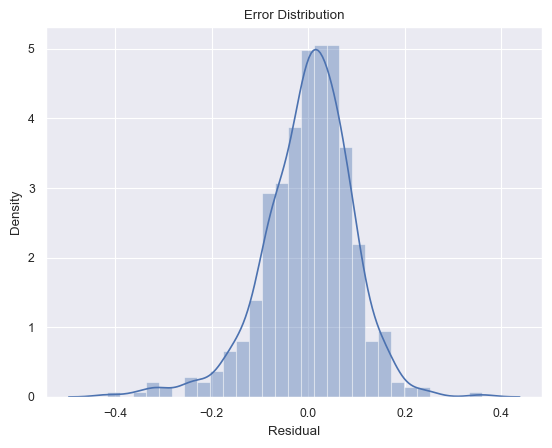

In [68]:
residuals, y_train_pred = plot_residuals(lr_model, X_train, y_train)

## 7.2 Independent Error Terms

Text(0, 0.5, 'Residuals')

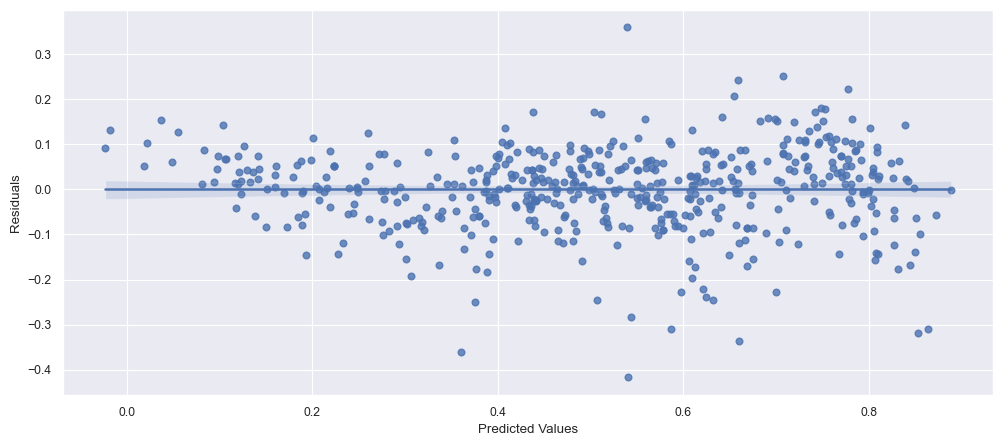

In [69]:
plt.figure(figsize=(12,5))
sns.regplot(x=y_train_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

There is no specific pattern identified for Residuals with respect to the predicted values

## 7.3. Homoscedasticity

<Axes: xlabel='cnt'>

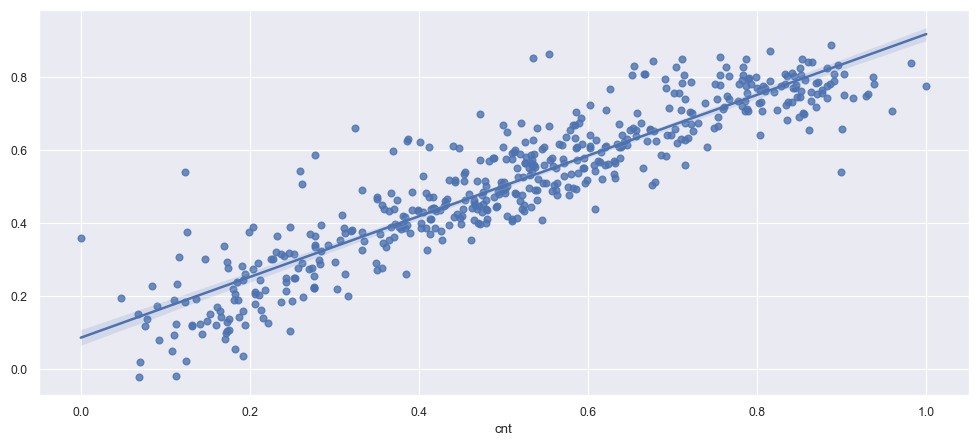

In [70]:
plt.figure(figsize=(12,5))
sns.regplot(x=y_train, y=y_train_pred)


The predicted values are equally distirbuted along the actual values. There is no unequal variances observed.

## 7.4 Multicorrelations

In [71]:
calculateVif(X_train)

,Features,VIF
5,windspeed,4.60
6,temp,3.84
8,year,2.07
9,season_Spring,1.99
7,season_Summer,1.90
3,season_Winter,1.63
1,weathersit_Mist,1.55
4,month_name_September,1.23
2,weathersit_LightFalls,1.08
0,holiday,1.04


All VIF values are under 5.

## 7.5 R2 For Train DataSet

In [72]:
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8327073211549112

# 8. Prediction on Test data

In [73]:
test_data[vars_to_rescale] = scaler.transform(test_data[vars_to_rescale])
test_data.describe()

,holiday,workingday,temp,humidity,windspeed,cnt,year,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightFalls,weathersit_Mist,month_name_August,month_name_December,month_name_February,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.551340,0.313293,0.522154,0.481818,0.254545,0.263636,0.236364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.187620,0.459303,0.233187,0.184403,0.159584,0.219163,0.500809,0.436599,0.441609,0.425817,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.046591,0.084665,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.416134,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.535676,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.682271,0.402718,0.677750,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,1.002662,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 8.1 Predict using test data

In [74]:
y_test = test_data.pop('cnt')
X_test = test_data[selected_columns]
X_test_sm = sm.add_constant(X_test)
y_test_predict = lr_model.predict(X_test_sm)

## 8.2 Compare the predictions

<Axes: xlabel='cnt'>

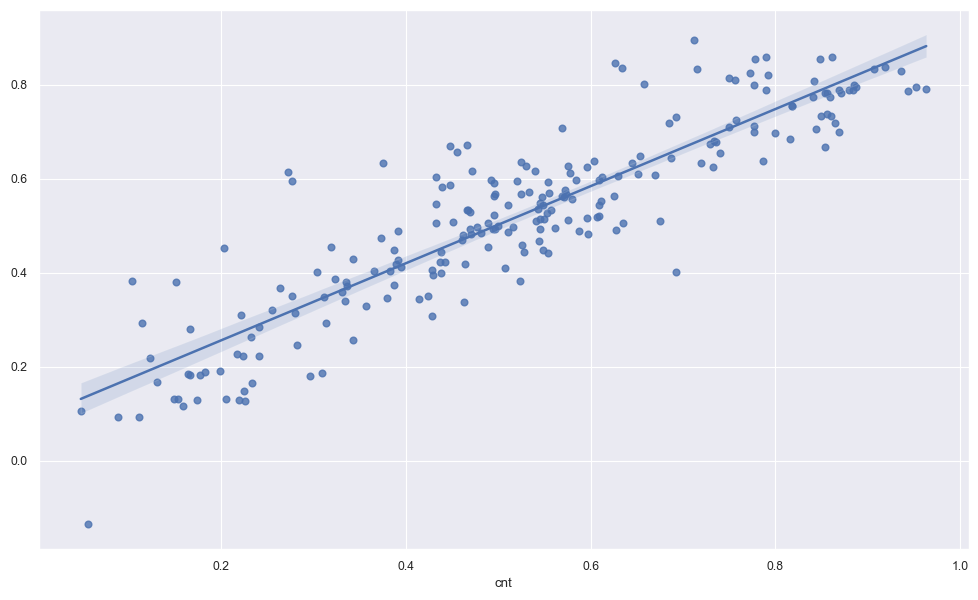

In [75]:
plt.figure(figsize=(12, 7))
sns.regplot(x=y_test, y=y_test_predict)

## 8.3 R-Score Check For training data set

In [76]:
r2_score(y_true=y_test, y_pred=y_test_predict)

0.8038195990728844

# 9. Conclusion

Based on the above model, the significant params are :

In [77]:
lr_model.params

const                    0.190855
holiday                 -0.096316
weathersit_Mist         -0.078741
weathersit_LightFalls   -0.285031
season_Winter            0.094476
month_name_September     0.090998
windspeed               -0.148098
temp                     0.477737
season_Summer            0.062076
year                     0.234132
season_Spring           -0.055406
dtype: float64

The variables which the bike sharing numbers are:
- Holiday
- Misty weather
- Light Falls
- Winter Season
- September
- Windspeed
- Temperature
- Summer Season
- Year
- Spring Season